# PCA vs t-SNE

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
A = np.random.normal(scale=1, size=(300,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])
A.shape, B.shape

((300, 3), (290, 3))

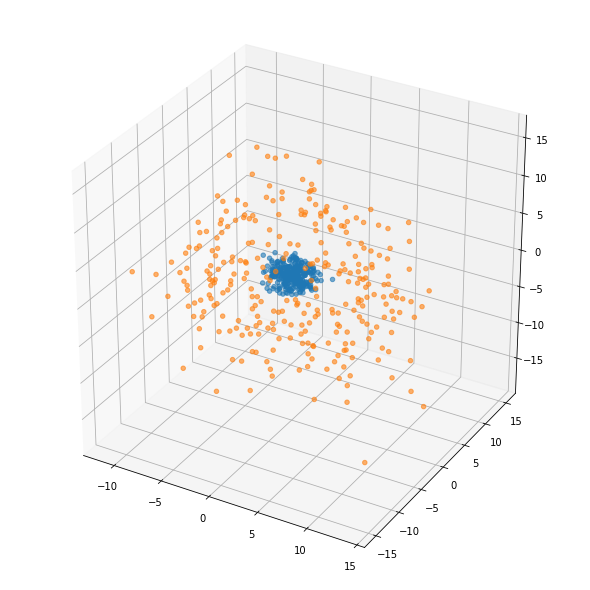

In [3]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig);
ax.scatter(A[:,0], A[:,1], A[:,2], alpha=0.6)
ax.scatter(B[:,0], B[:,1], B[:,2], alpha=0.6);


In [4]:
def plotProjection(Z):
    A2 = Z[:A.shape[0], :]
    B2 = Z[A.shape[0]:, :]

    fig, ax = plt.subplots(1, figsize=(7,7))
    ax.scatter(A2[:,0], A2[:,1], alpha=0.6)
    ax.scatter(B2[:,0], B2[:,1], alpha=0.6)
    return fig, ax

## PCA

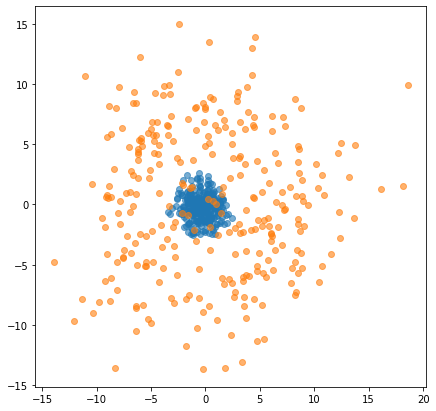

In [5]:
from sklearn.decomposition import PCA
X = np.r_[A, B]
X2 = PCA(n_components = 2).fit_transform(X)

plotProjection(X2);

PCA aufgrund seiner linearen Natur, kann die ineinander liegenden Cluster nicht trennen.

---

## t-SNE

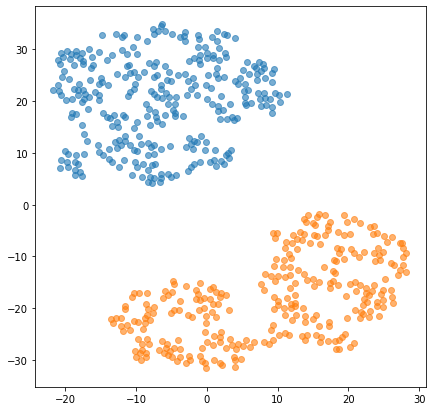

In [6]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2).fit_transform(X)
plotProjection(X3);

## Hyperparameter Perplexity

Die Perplexity hängt mit der Anzahl der nächsten Nachbarn zusammen, die betrachtet werden. Größere Datensätze erfordern in der Regel eine größere Perplexity. Wert zwischen 5 und 50 sind in der Regel geeignet. Unterschiedliche Werte können zu signifikant unterschiedlichen Ergebnissen führen.

Kleine Werte der Perplexity führen dazu, dass im wesentlichen nur lokale Beziehungen erhalten werden, große zum Erhalt auch weiter entfernter Beziehungen.

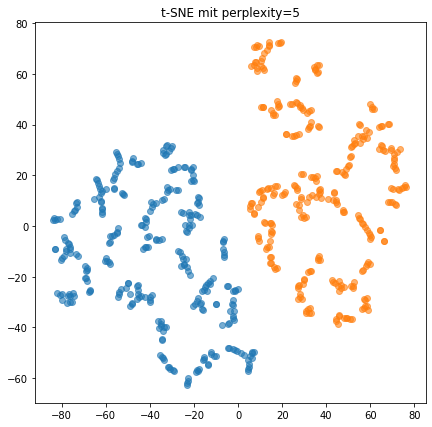

In [7]:
X4 = TSNE(n_components=2, perplexity=5).fit_transform(X)
fig, ax = plotProjection(X4);
ax.set_title('t-SNE mit perplexity=5');

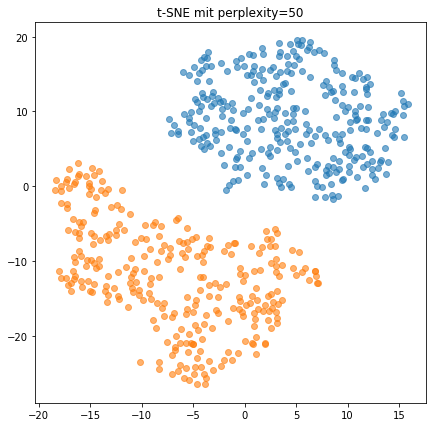

In [8]:
X5 = TSNE(n_components=2, perplexity=50).fit_transform(X)
fig, ax = plotProjection(X5);
ax.set_title('t-SNE mit perplexity=50');

**Beachte:** Wiederholte Läufe mit den gleichen Hyperparametern müssen nicht zu denselben Ergebnissen führen:

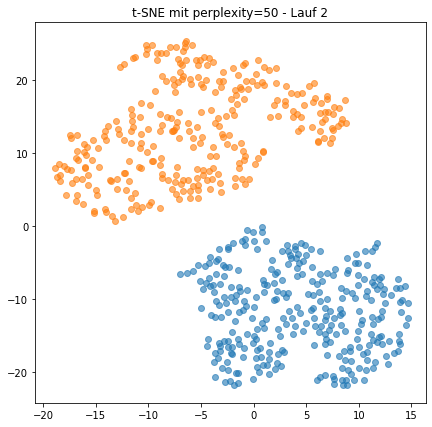

In [9]:
X6 = TSNE(n_components=2, perplexity=50).fit_transform(X)
fig, ax = plotProjection(X6);
ax.set_title('t-SNE mit perplexity=50 - Lauf 2');

**Extremere Werte** für Perplexity führen zu schlechten Ergebnissen:

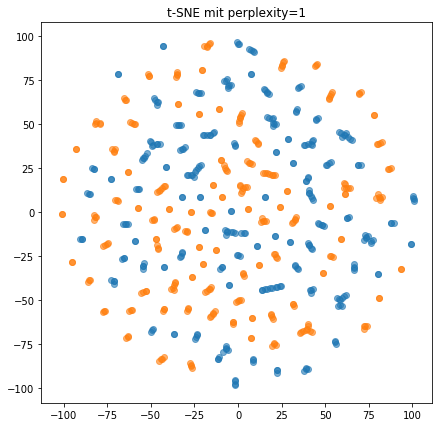

In [10]:
X7 = TSNE(n_components=2, perplexity=1).fit_transform(X)
fig, ax = plotProjection(X7);
ax.set_title('t-SNE mit perplexity=1');

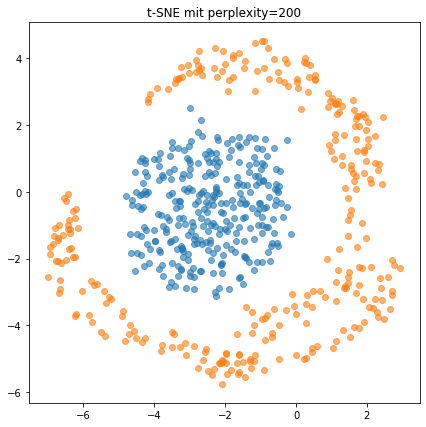

In [11]:
X7 = TSNE(n_components=2, perplexity=200).fit_transform(X)
fig, ax = plotProjection(X7);
ax.set_title('t-SNE mit perplexity=200');

**Hinweis:**

Sehr schöne Erläuterung und Figuren zu den Eigenheiten der Darstellung von t-SNE: [https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/)